In [48]:
import pandas as pd
import numpy as np

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# import torch.nn as nn
# from torch.utils.data import DataLoader
# import torch.optim as optim
# import torch
from sklearn.model_selection import train_test_split
import os
import sys
from sklearn.metrics import accuracy_score
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

In [50]:
# Set the root directory of your repo as part of the path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [51]:
data = pd.read_csv('../Data/combined/full_lathan.csv')

/tmp/ipykernel_609189/4119657318.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../Data/combined/full_lathan.csv')


In [52]:
from src.data.preprocess import (
    combine_team_rows,
    add_home_win_column,
    split_wins_losses,
    add_playoff_indicator,
    combine_date_columns,
    remove_all_star_and_playoff_games,
    create_ml_dataset

)

In [92]:
data2.columns

Index(['GAME_ID', 'GAME_SEQUENCE', 'Date', 'YEAR', 'GAME_DATE_EST', 'a_index',
       'a_TEAM_ID', 'a_TEAM_WINS_LOSSES', 'a_PTS', 'a_FG_PCT', 'a_FT_PCT',
       'a_FG3_PCT', 'a_AST', 'a_REB', 'a_TOV', 'h_index', 'h_TEAM_ID',
       'h_TEAM_WINS_LOSSES', 'h_PTS', 'h_FG_PCT', 'h_FT_PCT', 'h_FG3_PCT',
       'h_AST', 'h_REB', 'h_TOV', 'HOME_WIN', 'a_WINS', 'a_LOSSES', 'h_WINS',
       'h_LOSSES', 'a_SEASON_GAMES_PLAYED', 'h_SEASON_GAMES_PLAYED',
       'IS_PLAYOFF_GAME', 'a_season_PTS_lag', 'a_season_AST_lag',
       'a_season_REB_lag', 'a_season_TOV_lag', 'a_season_FG_PCT_avg',
       'a_season_FT_PCT_avg', 'a_season_FG3_PCT_avg', 'a_WIN_PCT',
       'a_WIN_PCT_LAST10', 'h_season_PTS_lag', 'h_season_AST_lag',
       'h_season_REB_lag', 'h_season_TOV_lag', 'h_season_FG_PCT_avg',
       'h_season_FT_PCT_avg', 'h_season_FG3_PCT_avg', 'h_WIN_PCT',
       'h_WIN_PCT_LAST10'],
      dtype='object')

In [53]:
# Creating key predictor columns
data2 = create_ml_dataset(data)

In [62]:
# Filling in GAME_DATE_EST Nans
data2['GAME_DATE_EST'] = data2['Date']

In [103]:
data

,GAME_ID,GAME_SEQUENCE,Date,YEAR,GAME_DATE_EST,a_index,a_TEAM_ID,a_TEAM_ABBREVIATION,a_TEAM_CITY_NAME,a_TEAM_WINS_LOSSES,...,h_REB,h_TOV,HOME_WIN,a_WINS,a_LOSSES,h_WINS,h_LOSSES,a_SEASON_GAMES_PLAYED,h_SEASON_GAMES_PLAYED,IS_PLAYOFF_GAME
0,21200001,1,2012-10-30,2012-2013,NaN,1,1610612739,CLE,Cleveland,1-0,...,39,12,0,0,0,0,0,0,0,0
1,21200002,2,2012-10-30,2012-2013,NaN,2,1610612738,BOS,Boston,0-1,...,36,8,1,0,0,0,0,0,0,0
2,21200003,3,2012-10-30,2012-2013,NaN,4,1610612742,DAL,Dallas,1-0,...,46,14,0,0,0,0,0,0,0,0
3,21200004,1,2012-10-31,2012-2013,NaN,6,1610612754,IND,Indiana,1-0,...,42,10,0,0,0,0,0,0,0,0
4,21200005,2,2012-10-31,2012-2013,NaN,8,1610612743,DEN,Denver,0-1,...,47,15,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8605,21801226,7,2019-04-10,2018-2019,NaN,17217,1610612749,MIL,Milwaukee,60-22,...,53,12,1,60,21,48,33,81,81,0
8606,21801227,8,2019-04-10,2018-2019,NaN,17218,1610612742,DAL,Dallas,33-49,...,53,10,1,33,48,47,34,81,81,0
8607,21801228,9,2019-04-10,2018-2019,NaN,17221,1610612743,DEN,Denver,54-28,...,41,10,0,53,28,36,45,81,81,0
8608,21801229,10,2019-04-10,2018-2019,NaN,17223,1610612746,LAC,LA,48-34,...,57,17,0,47,34,50,31,81,81,0


In [99]:
# Checking Nans totals for differnet columns
data2.isna().sum().sort_values(ascending=False)

h_WIN_PCT                108
a_WIN_PCT                102
h_WIN_PCT_LAST10          17
a_WIN_PCT_LAST10          13
h_season_FG_PCT_avg        1
a_season_FT_PCT_avg        1
a_season_FG_PCT_avg        1
a_season_FG3_PCT_avg       1
h_season_FG3_PCT_avg       1
h_season_FT_PCT_avg        1
a_PTS                      0
YEAR                       0
GAME_DATE_EST              0
a_index                    0
a_TEAM_ID                  0
a_TEAM_WINS_LOSSES         0
GAME_ID                    0
GAME_SEQUENCE              0
Date                       0
h_PTS                      0
h_TEAM_WINS_LOSSES         0
h_TEAM_ID                  0
h_index                    0
a_TOV                      0
a_REB                      0
a_AST                      0
a_FG3_PCT                  0
a_FT_PCT                   0
a_FG_PCT                   0
h_FG_PCT                   0
h_FT_PCT                   0
h_REB                      0
h_TOV                      0
h_FG3_PCT                  0
h_AST         

In [118]:
# Formatting data for Tabnet
y = data2['HOME_WIN']                # Response variable
X = data2.drop(columns=['HOME_WIN']) # Table with predictors
X = X.select_dtypes(include=[np.number])  # keep only numeric columns
X = X.dropna()                           # Dropping missing values for now
y = y.loc[X.index]                       # Matching y and x data

In [119]:
from sklearn.model_selection import train_test_split


# Creating train/test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False) 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

In [120]:
# Turning data sets to arrays
X_train = X_train.values
y_train = y_train.values
X_val = X_val.values
y_val = y_val.values
X_test = X_test.values
y_test = y_test.values

In [121]:
# 5. Train TabNet
clf = TabNetClassifier(
    n_d=64, n_a=64, n_steps=5,
    gamma=1.5, n_independent=2, n_shared=2,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":10, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type="entmax"
)

clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_val, y_val)],
    eval_name=["val"],
    eval_metric=["accuracy"],
    max_epochs=100, patience=10,
    batch_size=256, virtual_batch_size=128,
    num_workers=0, drop_last=False
)

# 6. Evaluate performance
y_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# 7. Predict probabilities (for ROI simulation)
y_proba = clf.predict_proba(X_test)[:, 1]  # probability home team wins

/home/ehe5bn/.local/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.88087 | val_accuracy: 0.4894  |  0:00:03s
epoch 1  | loss: 0.51538 | val_accuracy: 0.50432 |  0:00:04s
epoch 2  | loss: 0.41396 | val_accuracy: 0.51453 |  0:00:04s
epoch 3  | loss: 0.29031 | val_accuracy: 0.67478 |  0:00:05s
epoch 4  | loss: 0.24692 | val_accuracy: 0.65829 |  0:00:06s
epoch 5  | loss: 0.21049 | val_accuracy: 0.79262 |  0:00:06s
epoch 6  | loss: 0.18158 | val_accuracy: 0.75648 |  0:00:07s
epoch 7  | loss: 0.19131 | val_accuracy: 0.74548 |  0:00:08s
epoch 8  | loss: 0.13344 | val_accuracy: 0.5106  |  0:00:09s
epoch 9  | loss: 0.11403 | val_accuracy: 0.89238 |  0:00:09s
epoch 10 | loss: 0.15181 | val_accuracy: 0.86332 |  0:00:10s
epoch 11 | loss: 0.11755 | val_accuracy: 0.93637 |  0:00:11s
epoch 12 | loss: 0.10582 | val_accuracy: 0.89945 |  0:00:11s
epoch 13 | loss: 0.10041 | val_accuracy: 0.93559 |  0:00:12s
epoch 14 | loss: 0.09544 | val_accuracy: 0.96229 |  0:00:13s
epoch 15 | loss: 0.07379 | val_accuracy: 0.91909 |  0:00:13s
epoch 16 | loss: 0.06883

/home/ehe5bn/.local/lib/python3.11/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Test Accuracy: 0.9843014128728415


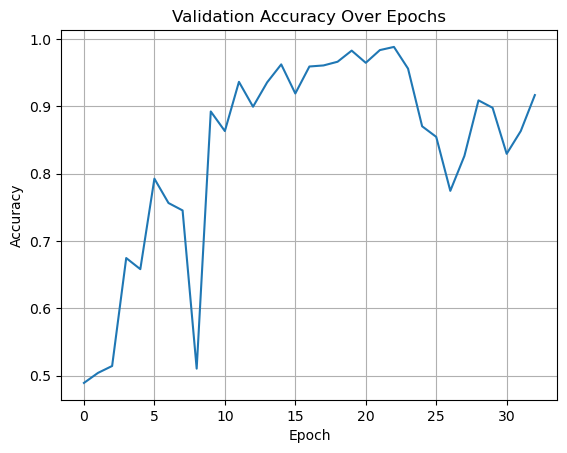

In [122]:
val_acc = clf.history['val_accuracy']
plt.plot(val_acc)
plt.title("Validation Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()